<h1 style="color:rgb(0,120,170)">Assignment 8: CNNs </h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

<h2 style="color:rgb(0,120,170)">Task 1: Explicit Computation of CNNs</h2>




<h2 style="color:rgb(0,120,170)">Task 1.1: Convolution and Stride</h2>

In this task, you should do some computuations for CNNs explicitly to gain further understanding how the corresponding operations work. 

<b>Your are not allowed to use any other modules than numpy for all the problems in Task 1.</b>

Assume you are given the following input image, represented as $\mathbf{x}=\begin{pmatrix} 1 & 0 & 1 & 1 & 0 & 0 \\ 0 & 1 & 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 1 & 1 & 0 \\ 1 & 1 & 0 & 1 & 1 & 1 \\ 0 & 1 & 1 & 1 & 0 & 0 \\ 1 & 1 & 1 & 0 & 0 & 1  \end{pmatrix}$.
* Consider the filter $\mathbf{W}=\begin{pmatrix} 1 & 1 & 1 \\ 0 & 2 & 0 \\ 1 & 1 & 1 \end{pmatrix}$ and compute $\mathbf{s}=\mathbf{W} * \mathbf{x}$. To do this, implement the function `compute_convolution` which computes the output.
* Now add the functionality of using the stride parameter to the function and test it for $S=2$.

<h3 style="color:rgb(208,90,80)">1.1 Code (20 points)</h3>

In [1]:
# only numpy is allowed in Task 1 !
import numpy as np


In [2]:
# Just run this cell to see your inputs
def print_array(name: str, arr:np.ndarray):
    """Nicely prints your arrays.
    Parameters
    ----------
    name : str
        name (title) of printed array
    arr : np.ndarray
        input array
    returns: nothing, just prints name, array and its shape.
    """   
    if type(arr) == bool:
        print("False")
        print("\nYou may have used invalid input parameters...")
        return
    print(f"{name}:\n")
    for row in arr:
        for element in row:
            if np.isclose(element,int(element)):
                print(f"{element:.0f}", sep= ' ',end=' ')
            else: 
                print(f"{element:.2f}", sep= ' ', end=' ')
        print()
    print(f"Shape: {arr.shape}")
    print("\n")

image = np.array([[1,0,1,1,0,0],[0,1,1,0,0,0],[0,1,0,1,1,0],[1,1,0,1,1,1],[0,1,1,1,0,0],[1,1,1,0,0,1]])
filter_ = np.array([[1,1,1],[0,2,0],[1,1,1]])

print_array("Image",image)
print_array("Filter",filter_)


Image:

1 0 1 1 0 0 
0 1 1 0 0 0 
0 1 0 1 1 0 
1 1 0 1 1 1 
0 1 1 1 0 0 
1 1 1 0 0 1 
Shape: (6, 6)


Filter:

1 1 1 
0 2 0 
1 1 1 
Shape: (3, 3)




In [3]:
def compute_convolution(image:np.ndarray,filter_:np.ndarray,stride:int) -> np.ndarray:
    """Function that computes the convolution of an image array with a given filter.
    Parameters
    ----------
    image : np.ndarray
        Input image
    filter_ : np.ndarray
        Convolution filter
    stride : int
        Stride parameter for convolution.

    Returns
    -------
    np.ndarray
        Convoluted image
    """
    img_h, img_w = image.shape
    filter_h, filter_w = filter_.shape

    out_h = ((img_h - filter_h) // stride) + 1
    out_w = ((img_w - filter_w) // stride) + 1

    convolved = np.zeros((out_h, out_w))

    for i in range(0, img_h - filter_h + 1, stride):
        for j in range(0, img_w - filter_w + 1, stride):
            convolved[i // stride][j // stride] = np.sum(image[i:i + filter_h, j:j + filter_w] * filter_)

    return convolved

In [4]:
stride_1=compute_convolution(image,filter_,1)
assert stride_1.shape == (4,4),("Expected shape for stride=1: 4x4")
print_array("Convoluted image with stride=1",stride_1)
stride_3=compute_convolution(image,filter_,3)
assert stride_3.shape == (2,2),("Expected shape for stride=1: 4x4")
print_array("Convoluted image with stride=3",stride_3)


Convoluted image with stride=1:

5 6 4 3 
6 4 5 5 
5 5 6 5 
7 6 5 4 
Shape: (4, 4)


Convoluted image with stride=3:

5 3 
7 4 
Shape: (2, 2)




<h2 style="color:rgb(0,120,170)">Task 1.2: Pooling</h2>

After convolution layers, you usually find pooling layers in CNNs to reduce the input size for further layers. To this end, we ask you to implement your own pooling function as well.

* Implement the function `pooling(image:np.array,pooling_size:int,pooling_type:str, n_max=1)` which applies one of the following 3 pooling methods, given as the input string parameter `pooling_type`:
    1. `"max-pooling"` applies max-pooling - using the maximum of all values in the pooling window.
    2. `"mean-pooling"` applies mean-pooling - using the mean of all values in the pooling window.
    3. `"n-max-pooling"` applies n-max-pooling for a given optional parameter `n_max:int` - using the mean of the "n" maximum values in the
    pooling window (defaults to max-pooling). Refer to the lecture material for more elaborate definitions.
    4. Raise a ValueError if `pooling_type` is not one of those 3 or `n_max` is larger than the maximum of values in the window in n-max pooling.


**Hint:** You can reuse big parts of the previous task for this. Assume that stride=pooling_size for the pooling operation e.g. pooling with non-overlapping windows (like shown in the lecture slides of Unit 7 p.15).

<h3 style="color:rgb(208,90,80)">1.2 Code (20 points)</h3>

In [5]:
def pooling(image:np.ndarray,pooling_size:int,pooling_type:str,n_max=1):
    """Function that applies desired pooling-type on image
    Parameters
    ----------
    image : np.ndarray
        Input image
    pooling_size : int
        Size of pooling window (pooling_size X pooling_size)
    pooling_type : str
        type of pooling that should be applied, choose from "max-pooling","mean-pooling","n-max-pooling"
    n_max : int, optional
        parameter for n-max-pooling, by default 1

    Returns
    -------
    np.ndarray
        Pooled image array

    Raises
    ------
    ValueError
        If the desired pooling type does not exist.
    ValueError
        If pooling_type="n_max" and n_max is larger than there are elements in the pooling window.
    """
    if pooling_type not in ["max-pooling", "mean-pooling", "n-max-pooling"]:
        raise ValueError("choose from 'max-pooling', 'mean-pooling', 'n-max-pooling'.")

    img_h, img_w = image.shape

    out_h = img_h // pooling_size
    out_w = img_w // pooling_size

    pooled = np.zeros((out_h, out_w))

    for i in range(0, img_h, pooling_size):
        for j in range(0, img_w, pooling_size):
            window = image[i:i + pooling_size, j:j + pooling_size]
            if pooling_type == "max-pooling":
                pooled[i // pooling_size][j // pooling_size] = np.max(window)
            elif pooling_type == "mean-pooling":
                pooled[i // pooling_size][j // pooling_size] = np.mean(window)
            elif pooling_type == "n-max-pooling":
                if n_max > pooling_size * pooling_size:
                    raise ValueError("n_max is larger than the number of elements in the pooling window.")
                flat_window = window.flatten()
                pooled[i // pooling_size][j // pooling_size] = np.mean(np.partition(flat_window, -n_max)[-n_max:])

    return pooled

In [6]:
# inspect your pooled images - shapes should be 2 X 2 for all of them
print_array("Max-pooling with window size 2:",pooling(stride_1,2,"max-pooling"))
print_array("Mean-pooling with window size 2:",pooling(stride_1,2,"mean-pooling"))
print_array("N-max-pooling with window size 2 and n_max=3:",pooling(stride_1,2,"n-max-pooling",3))

# test your pooled images
## for n_max = 1, n-max-pooling should == max-pooling, 
## for n_max = pooling_size**2, n-max-pooling should == mean-pooling
assert np.allclose(pooling(image,2,"max-pooling"),pooling(image,2,"n-max-pooling",1)),("For n_max = 1, n-max-pooling should == max-pooling!")
assert np.allclose(pooling(image,2,"mean-pooling"),pooling(image,2,"n-max-pooling",2**2)),("For n_max = pooling_size**2, n-max-pooling should == mean-pooling!")


Max-pooling with window size 2::

6 5 
7 6 
Shape: (2, 2)


Mean-pooling with window size 2::

5.25 4.25 
5.75 5 
Shape: (2, 2)


N-max-pooling with window size 2 and n_max=3::

5.67 4.67 
6 5.33 
Shape: (2, 2)




<h2 style="color:rgb(0,120,170)">Task 1.3: Padding</h2>

Right now, our implementation for the convolution will decrease the image size in any case, but often one wants to end up with a specific dimension in the end. Therefore we need to manipulate the given image in order to be able to apply the convolution in a way that delivers the desired output.

* Implement the function `compute_padding_size()` which calculates the needed padding size given the original size, kernel (=filter) size and a stride parameter to end up with some desired size of the feature map in the end. You can assume that height = width for all entities. Keep in mind that only a non-negative integer solution will make sense in this case, so if the result is not an integer or smaller than 0, return "False".

* Implement the function `padding(image:np.ndarray, pad_size:int, pad_type:str)` which applies one of the two following padding-operations: 
    1. Zero-padding: `pad_type="zero"` - Image is padded with `pad_size` number of zeros on all four sides.
    
        Example: $\begin{pmatrix} 0 & 1 & 1 \\ 0 & 2 & 0 \\ 1 & 1 & 1 \end{pmatrix} \rightarrow$ pad-size = 1, pad_type = "zero": $\begin{pmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 1 & 0 \\ 0 & 0 & 2 & 0 & 0\\ 0& 1 & 1 & 1 & 0 \\ 0& 0 & 0 & 0 & 0\end{pmatrix}$
    
    2. Repeat-padding: `pad_type="repeat"` - Also "Replication-" or "Reflection-padding", Values at the borders of the image are used to pad the image. Use only the outer-most values, in the corners repeat the value in the corner 3 times for each padding layer.   
    Example: $\begin{pmatrix} 0 & 1 & 1 \\ 0 & 2 & 0 \\ 1 & 1 & \color{red}1 \end{pmatrix} \rightarrow$ pad-size = 1, pad_type = "repeat": $\begin{pmatrix} 0 & 0 & 1 & 1 & 1 \\ 0 & 0 & 1 & 1 & 1 \\ 0 & 0 & 2 & 0 & 0\\ 1& 1 & 1 & \color{pink}1 & \color{red}1 \\ 1& 1 & 1 & \color{red}1 & \color{red}1\end{pmatrix}$


<h3 style="color:rgb(208,90,80)">1.3 Code (20 points)</h3>

In [7]:
def compute_padding(input_size:int,feature_size:int,filter_size:int,stride:int): 
    """
    Function that computes necessary padding to receive desired image shape after convolution.
    Remember that padding is usually done before the convolution, for now ignore possible pooling afterwards.
    It is possible that invalid input parameters lead to "half-integer" results, or negative values;
    if that is the case the function should return False.
    Parameters
    ----------
    input_size : int
        size of input image
    feature_size : int
        desired size of final output
    filter_size : int
        filter size of convolution
    stride : int
        stride of convolution

    Returns
    -------
    int
        The required padding size as integer is returned if input parameters are valid (can be 0)
    False
        Returns False if the result is not an integer or a negative number
    """
    res = ((feature_size - 1) * stride - input_size + filter_size) / 2

    if res.is_integer() and res >= 0:
        return int(res)
    else:
        return False

In [8]:
# compute padding for 4x4 input, desired output: 6x6, filter size 2x2 and stride = 2: 
assert compute_padding(4,6,2,2) == 4,("Wrong result for compute_padding.")
assert type(compute_padding(4,2,2,2)) == int, ("Padding of zero should also be possible.")
print("Necessary padding: ",compute_padding(4,6,2,2))
print("Necessary padding: ",compute_padding(4,2,2,2))

Necessary padding:  4
Necessary padding:  0


In [9]:
def padding(image:np.ndarray, pad_size:int, pad_type:str):
    """Function that pads an Image with either zero-padding or repeat-padding.
    Parameters
    ----------
    image : np.ndarray
        input image
    pad_size : int
        how much padding should be applied on either side of the image, should also work with pad_size = 0
    pad_type : str
        type of padding: "zero" or "repeat" 

    Returns
    -------
    np.ndarray
        padded image array

    Raises
    ------
    ValueError
        Raises ValueError for inputs other than "zero" or "repeat" for pad_type
    ValueError
        Raises ValueError if pad_size is smaller than 0.

    """
    if pad_type not in ["zero", "repeat"]:
        raise ValueError("choose from zero, repeat")

    height, width = image.shape

    if pad_type == "zero":
        padded = np.zeros((height + 2 * pad_size, width + 2 * pad_size))
        padded[pad_size:pad_size + height, pad_size:pad_size + width] = image
    elif pad_type == "repeat":
        padded = np.pad(image, pad_width=pad_size, mode='edge')

    return padded

In [10]:
# test your implementation
image_test = np.array([[0,0,1,1],[0,1,1,0],[0,1,0,1],[1,1,0,1]])
filter_test = np.array([[1,1],[0,2]])

correct_ = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0,],
                    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,],
                    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0,],
                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0,],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]])
print_array("Original Image:", image_test)
assert np.allclose(correct_, padding(image_test,3,"zero")),("Zero-padding result not correct!")
print_array("Image after zero-padding with padding size 3", padding(image_test,3,'zero'))
print_array("Image after repeat-padding with padding size 3:",padding(image_test,3,'repeat'))

Original Image::

0 0 1 1 
0 1 1 0 
0 1 0 1 
1 1 0 1 
Shape: (4, 4)


Image after zero-padding with padding size 3:

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 1 0 0 0 
0 0 0 0 1 1 0 0 0 0 
0 0 0 0 1 0 1 0 0 0 
0 0 0 1 1 0 1 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
Shape: (10, 10)


Image after repeat-padding with padding size 3::

0 0 0 0 0 1 1 1 1 1 
0 0 0 0 0 1 1 1 1 1 
0 0 0 0 0 1 1 1 1 1 
0 0 0 0 0 1 1 1 1 1 
0 0 0 0 1 1 0 0 0 0 
0 0 0 0 1 0 1 1 1 1 
1 1 1 1 1 0 1 1 1 1 
1 1 1 1 1 0 1 1 1 1 
1 1 1 1 1 0 1 1 1 1 
1 1 1 1 1 0 1 1 1 1 
Shape: (10, 10)




<h2 style="color:rgb(0,120,170)">Task 1.4: The Whole Process</h2>

Now everything should be in place and we can combine the implemented solution into one pipeline.

* Implement the function `process_image(...)` which takes an image, output size, filter, a stride parameter and all other necessary inputs for the sub-functions as input and first computes the convolution followed by pooling. 
Keep in mind, that the image might have to be padded before application of the convolution to get the desired output shape.

**Note:** You can still assume that both image and kernel are quadratic (i.e. height = width).

<h3 style="color:rgb(208,90,80)">1.4 Code (15 points)</h3>

In [11]:
def process_image(image:np.ndarray,
                  feature_size:int,
                  filter_:np.ndarray,
                  stride:int,
                  pooling_size:int,
                  pooling_type:str,
                  padding_type:str,
                  compute_padding_size_function:callable,
                  padding_function:callable,
                  compute_convolution_function:callable,
                  pooling_function:callable,
                  n_max = 1):
    """Function that processes an image array. It first calculates the necessary padding, if padding is possible (integer) it
    performs the padding, followed by convolution and pooling.
    Your previously implemented functions will be fed to this function.
    Make sure to only use the functions and their respective names provided inside this function!

    Parameters
    ----------
    image : np.ndarray
        input image
    feature_size : int
        desired shape after convolution
    filter_ : np.ndarray
        filter ("kernel") applied during convolution
    stride : int
        stride parameter of convolution
    pooling_size : int
        pooling size
    pooling_type : str
        type of pooling (mean-, max- or n-max-pooling)
    padding_type : str
        type of padding (zero or repeat)
    compute_padding_size_function : callable
        the compute padding size function implemented by you, use is to compute the padding size
    padding_function : callable
        the padding function implemented by you, use it to pad the input image
    compute_convolution_function : callable
        the convolution function implemented by you, use it to convolve the (padded) input image
    pooling_function : callable
        the pooling function implemented by you, use it to apply pooling on your convolved image
    n_max: int, optional
        n_max parameter for n-max-pooling if applied, defaults to 1

    Returns
    -------
    np.ndarray
        Returns processed image if inputs are valid and padding is possible (also if padding is just 0!)
        else: returns False
    """
    padding_size = compute_padding_size_function(input_size=image.shape[0], feature_size=feature_size, 
                                                 filter_size=filter_.shape[0], stride=stride)

    if padding_size is False:
        return False

    padded_image = padding_function(image, padding_size, padding_type)

    conv_image = compute_convolution_function(padded_image, filter_, stride)

    result = pooling_function(conv_image, pooling_size, pooling_type, n_max)

    return result

In [12]:
# test your implementation
correct_5 = np.array([[0, 4, 4,], [2, 3, 4,], [4, 4, 4,]])
res = process_image(image_test,6,filter_test,2,2,"max-pooling","repeat",compute_padding,padding,compute_convolution,pooling)
print_array("Your result:", res)
print_array("Solution:", correct_5)
assert np.allclose(res,correct_5),("Your result does not match the solution!")
assert process_image(image_test,6,filter_test,1,2,"max-pooling","repeat",compute_padding,padding,compute_convolution,pooling)==False,("Should return False for invalid inputs!")

Your result::

0 4 4 
2 3 4 
4 4 4 
Shape: (3, 3)


Solution::

0 4 4 
2 3 4 
4 4 4 
Shape: (3, 3)




In [13]:
# Here you can play around with the original image and filter
print_array("Processed original Image with max-pooling and zero-padding:", process_image(image,2,filter_,3,2,"max-pooling","repeat",compute_padding,padding,compute_convolution,pooling))

Processed original Image with max-pooling and zero-padding::

7 
Shape: (1, 1)




<h2 style="color:rgb(0,120,170)">Task 2: CNNs vs. the Rest</h2>

In this task, we will carry out a comparison of several classifiers on different portions of the FashionMNIST data set. From the whole training data we create smaller training sets that have $[0.05,0.10,0.25, 0.50, 1.00]$ times the the size of the total set. Compared to the previous assignment, the data loader is modified a little so that it outputs different formats for the computations with Pytorch, where we use tensors, and sklearn, where we use numpy arrays.
We make our comparison based on three metrics:
* Accuracy: The standard (but not necessarily best) metric for evaluating the performance of a model in predicting the labels of unseen samples (correct predictions divided by number of samples in test set).
* Training Time: For RandomForest and SVM this is the time measured for fitting the model on the training data, for the CNNs it's the time measured from initialization of the model until the end of the last training epoch (sum over all epochs).
* Inference Time: Time measured for the model to calculate predictions on the test data, for CNNs it's the mean of the time taken to calculate predictions over all epochs.

To save computation time, you may also use the hard-coded experiment results at the end of this task.

In [14]:
## To install pytorch for this assignment use:
#!conda install pytorch torchvision -c pytorch -y
## OR if you use pip
#!pip install pytorch torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from IPython.display import clear_output, display

In [15]:
int_classes = int 
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [16]:
### use Pytorch dataloader with a subset of the training data
def get_sampler(N_samples):  
    mask = list(np.arange(N_samples))  ## list of valid sample_ids
    return torch.utils.data.RandomSampler(mask) ## random order

def get_data_loader(use_cuda,batch_size=64,train=True,get_all=False,sampler=None):
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    loader = torch.utils.data.DataLoader(
        #datasets.FashionMNIST(os.path.join('.','..','data')
        datasets.FashionMNIST(os.path.join('data')
                            ,train=train, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.2859,), (0.3530,))
                       ])), shuffle=False, sampler=sampler, batch_size=batch_size,**kwargs)
    ## return numpy arrays of the dataset
    if get_all: 
        for _, (train_samples, train_labels) in enumerate(loader):
            return train_samples.numpy().reshape(-1,28*28),train_labels.numpy()
    ## return loader to provide minibatches
    else:
        return loader

### prepare data for sklearn models
train_samples, train_labels = get_data_loader(use_cuda,batch_size=6*10**4,train=True,get_all = True)
test_samples, test_labels = get_data_loader(use_cuda,batch_size=10**4,train=False,get_all = True)

Now we want to apply different models to our prepared data. We also want to print and store accuracy, training time and inference time, so these should be our results. In the dictionary "experiments", we want to store these informations in an array for the different models and different training data sizes. Just run the code in oder to understand better what is meant exactly.

In [17]:
models = ["RF_100","RF_500","SVM","CNN_simple","CNN_wide","CNN_deep","CNN_wide_max"]
results = ["accuracy","training_time","inference_time"]
experiments = {}
experiments["percentages"] = np.array([0.05,0.10,0.25,0.50,1.00])
experiments["N_samples"] = (60000 * experiments["percentages"]).astype(int)

for k in models:
    experiments[k] = {}
    for l in results:
        experiments[k][l] = np.zeros([len(experiments["N_samples"])])

experiments

{'percentages': array([0.05, 0.1 , 0.25, 0.5 , 1.  ]),
 'N_samples': array([ 3000,  6000, 15000, 30000, 60000]),
 'RF_100': {'accuracy': array([0., 0., 0., 0., 0.]),
  'training_time': array([0., 0., 0., 0., 0.]),
  'inference_time': array([0., 0., 0., 0., 0.])},
 'RF_500': {'accuracy': array([0., 0., 0., 0., 0.]),
  'training_time': array([0., 0., 0., 0., 0.]),
  'inference_time': array([0., 0., 0., 0., 0.])},
 'SVM': {'accuracy': array([0., 0., 0., 0., 0.]),
  'training_time': array([0., 0., 0., 0., 0.]),
  'inference_time': array([0., 0., 0., 0., 0.])},
 'CNN_simple': {'accuracy': array([0., 0., 0., 0., 0.]),
  'training_time': array([0., 0., 0., 0., 0.]),
  'inference_time': array([0., 0., 0., 0., 0.])},
 'CNN_wide': {'accuracy': array([0., 0., 0., 0., 0.]),
  'training_time': array([0., 0., 0., 0., 0.]),
  'inference_time': array([0., 0., 0., 0., 0.])},
 'CNN_deep': {'accuracy': array([0., 0., 0., 0., 0.]),
  'training_time': array([0., 0., 0., 0., 0.]),
  'inference_time': array(

Next, we want to apply this routine to the sklearn models first (i.e RFs and SVMs) for the different sizes of the data set. 
We implemented the routine for Random Forest with 100 estimators, with 500 estimators and for SVM:

In [18]:
### code for experiments['RF_100'], just execute
for i,n_samples in enumerate(experiments["N_samples"]):
    print("Subset consists of {} samples".format(n_samples))
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed)
    
    start_train= time.time()
    model.fit(train_samples[:n_samples],train_labels[:n_samples])
    end_train = time.time()
    train_time = np.round(end_train-start_train,decimals=2)
    experiments["RF_100"]["training_time"][i] = train_time 
    print("training took {:.2f} seconds".format(train_time))
    
    start_infer= time.time()
    pred = model.predict(test_samples)
    end_infer = time.time()
    infer_time = np.round(end_infer-start_infer,decimals=2)
    experiments["RF_100"]["inference_time"][i] = infer_time
    print("inference took {:.2f} seconds".format(infer_time))
    
    accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                        decimals=2)
    print("test accuracy: {:.2f} percent".format(accuracy))
    experiments["RF_100"]["accuracy"][i] = accuracy

Subset consists of 3000 samples
training took 5.80 seconds
inference took 0.27 seconds
test accuracy: 81.95 percent
Subset consists of 6000 samples
training took 7.83 seconds
inference took 0.18 seconds
test accuracy: 83.16 percent
Subset consists of 15000 samples
training took 16.11 seconds
inference took 0.18 seconds
test accuracy: 83.97 percent
Subset consists of 30000 samples
training took 25.65 seconds
inference took 0.17 seconds
test accuracy: 84.20 percent
Subset consists of 60000 samples
training took 44.73 seconds
inference took 0.18 seconds
test accuracy: 84.22 percent


In [19]:
### code for experiments['RF_500'], just execute
for i,n_samples in enumerate(experiments["N_samples"]):
    print("Subset consists of {} samples".format(n_samples))
    model = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=seed)
    
    start_train= time.time()
    model.fit(train_samples[:n_samples],train_labels[:n_samples])
    end_train = time.time()
    train_time = np.round(end_train-start_train,decimals=2)
    experiments["RF_500"]["training_time"][i] = train_time 
    print("training took {:.2f} seconds".format(train_time))
    
    start_infer= time.time()
    pred = model.predict(test_samples)
    end_infer = time.time()
    infer_time = np.round(end_infer-start_infer,decimals=2)
    experiments["RF_500"]["inference_time"][i] = infer_time
    print("inference took {:.2f} seconds".format(infer_time))
    
    accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                        decimals=2)
    print("test accuracy: {:.2f} percent".format(accuracy))
    experiments["RF_500"]["accuracy"][i] = accuracy

Subset consists of 3000 samples
training took 18.26 seconds
inference took 0.76 seconds
test accuracy: 82.02 percent
Subset consists of 6000 samples
training took 33.36 seconds
inference took 0.87 seconds
test accuracy: 83.38 percent
Subset consists of 15000 samples
training took 70.35 seconds
inference took 0.85 seconds
test accuracy: 84.17 percent
Subset consists of 30000 samples
training took 127.61 seconds
inference took 0.92 seconds
test accuracy: 84.33 percent
Subset consists of 60000 samples
training took 225.36 seconds
inference took 0.82 seconds
test accuracy: 84.54 percent


In [20]:
### code for experiments['SVM'], just execute
for i,n_samples in enumerate(experiments["N_samples"]):
    print("Subset consists of {} samples".format(n_samples))
    model = SVC(gamma=0.1,kernel='poly',degree=5,random_state=seed)
    
    start_train= time.time()
    model.fit(train_samples[:n_samples],train_labels[:n_samples])
    end_train = time.time()
    train_time = np.round(end_train-start_train,decimals=2)
    experiments["SVM"]["training_time"][i] = train_time 
    print("training took {:.2f} seconds".format(train_time))
    
    start_infer= time.time()
    pred = model.predict(test_samples)
    end_infer = time.time()
    infer_time = np.round(end_infer-start_infer,decimals=2)
    experiments["SVM"]["inference_time"][i] = infer_time
    print("inference took {:.2f} seconds".format(infer_time))
    
    accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                        decimals=2)
    print("test accuracy: {:.2f} percent".format(accuracy))
    experiments["SVM"]["accuracy"][i] = accuracy

Subset consists of 3000 samples
training took 0.60 seconds
inference took 1.78 seconds
test accuracy: 81.34 percent
Subset consists of 6000 samples
training took 1.76 seconds
inference took 4.12 seconds
test accuracy: 83.63 percent
Subset consists of 15000 samples
training took 12.50 seconds
inference took 15.77 seconds
test accuracy: 86.07 percent
Subset consists of 30000 samples
training took 59.79 seconds
inference took 27.74 seconds
test accuracy: 87.90 percent
Subset consists of 60000 samples
training took 197.78 seconds
inference took 50.28 seconds
test accuracy: 89.21 percent


Now we want to run similar experiments with four different CNN models. Feel free to experiment with the networks. 
We first provide the training and test routine for the CNNs.

In [21]:
#nothing to do here, just execute
def train(model, device, train_loader, optimizer, epoch):
    model.train() 
    correct=0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.shape[0]
    print('Epoch {} \nTraining Accuracy: {}/{} ({:.2f}%)'.format(epoch,
    correct, total, 100*correct/total 
    )) 
    
def test(model, device, test_loader):
    model.eval()
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = np.round(100. * correct / len(test_loader.dataset),decimals=2)
    print('Test Accuracy: {}/{} ({:.2f}%)'.format(correct, len(test_loader.dataset), accuracy)) 
    return accuracy

Here we provide a routine that creates CNN models. It takes as inputs the hyper-parameters of the CNNs. It's not necessary to fully understand this routine at this stage, as this will be a main topic in further courses (e.g. Deep Learning 1&2).

In [22]:
#nothing to do here, just execute
class Net(nn.Module):
    def __init__(self,use_batch_norm=True,n_blocks=3,n_layers=3,channels = 32, multiply_channels=2, global_max = True):
        super(Net, self).__init__(),
        self.use_batch_norm = use_batch_norm
        self.n_blocks = n_blocks
        self.n_layers = n_layers
        self.channels = channels
        self.multiply_channels = multiply_channels
        self.global_max = global_max

        ## feature extraction CNN => linear layer (N_cannels to N_classes) => softmax
        self.cnn_module = self.build_model() 
        self.fc_module = nn.Sequential(
            nn.Linear(channels*multiply_channels**(n_blocks-1), 10)) 
        
    def build_model(self):
        channels_per_layer = [1,self.channels]
        for i in range(1,self.n_blocks):
            channels_per_layer.append(self.channels*self.multiply_channels**i)   
        
        components = []
        for i in range(self.n_blocks):
            for j in range(self.n_layers):
                if j== 0:
                    cur_dims = [channels_per_layer[i],channels_per_layer[i+1]]   ## first layer of the block
                else: 
                    cur_dims = [channels_per_layer[i+1],channels_per_layer[i+1]]

                if self.use_batch_norm:        ## no bias needed
                    components.append(
                        nn.Sequential(nn.Conv2d(cur_dims[0], cur_dims[1], kernel_size = 3,padding=1,bias=False),
                                     nn.BatchNorm2d(cur_dims[1], momentum=0.1),
                                     nn.ReLU()
                                     )
                    )
                else:                          
                    components.append(
                        nn.Sequential(nn.Conv2d(cur_dims[0], cur_dims[1], kernel_size = 3,padding=1),
                                     nn.ReLU()
                                     )
                    )
            if i == self.n_blocks-1:
                if self.global_max:
                    components.append(nn.Sequential(nn.AdaptiveMaxPool2d(1)))    ## finish with a global max pooling layer
                else:
                    components.append(nn.Sequential(nn.AdaptiveAvgPool2d(1)))    ## finish with a global average pooling layer
            else: 
                components.append(nn.Sequential(nn.MaxPool2d(2, stride = 2)))    ## downsampling via max_pooling of stride 2
        return nn.Sequential(*components)
        
    def forward(self, x):   
        x = self.cnn_module(x)    
        x = x.view(x.size(0), -1) 
        x = self.fc_module(x)     
        return F.log_softmax(x, dim=1)

Now let us run the different CNN models for the different sizes of the data sets.
You should run the experiments with the following four CNN models:
- a simple CNN with average pooling, called "CNN_simple"
- a wide CNN with average pooling, called "CNN_wide"
- a deep CNN with average pooling, called "CNN_deep"
- a wide CNN with max pooling, called "CNN_wide_max"

This is done now in a similar fashion as for the sklearn methods. Again accuracy, training time, and test time are stored in the experiments dictionary for the different sizes of the data sets. The number of trainable parameters for each of the four different CNNs is printed in the begining of the training loop of the corresponding model. This should allow you to get a rough idea of the complexities of these models.

<b>This can take up to 1h, depending on your hardware, maybe you go grab a coffee in the meantime...

In [23]:
## nothing to do here, just execute

max_epochs = 5

for model_tag in ["CNN_simple","CNN_wide","CNN_deep","CNN_wide_max"]:
    for i,n_samples in enumerate(experiments["N_samples"]):
        if  model_tag == "CNN_simple":
            ## a simple 'CNN with 3 layers with 16 channels each
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 16, multiply_channels=1,global_max=False).to(device)  ## simple
        elif model_tag == "CNN_wide":
            ## a wider version with 3 layers with 16,32 and 64 channels
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 32, multiply_channels=2,global_max=False).to(device)  ## wide
        elif model_tag == "CNN_deep":
            ## a deeper version with 9 layers with 16 channels each
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=3,channels = 16, multiply_channels=1,global_max=False).to(device)  ## deep
        elif model_tag == "CNN_wide_max":
            ## a wider version with 3 layers with 16, 32 and 64 channels, global maximum pooling
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 32, multiply_channels=2,global_max=True).to(device)  ## wide       

        optimizer = optim.Adam(model.parameters())
        sampler = get_sampler(experiments["N_samples"][i])
        train_loader = get_data_loader(use_cuda,64,train=True,sampler=sampler)
        test_loader = get_data_loader(use_cuda,128,train=False)

        if i == 0:
            print(model)
            print("\nThe model has {} parameters\n".format(sum(p.numel() for p in model.parameters())))
            
        print("Subset consists of {} samples".format(n_samples))
        epoch_times = []
        infer_times = []
        accuracies = []
        for epoch in range(1,max_epochs+1):
            start_epoch=time.time()
            train(model, device, train_loader, optimizer, epoch)
            end_epoch=time.time()
            epoch_time = np.round(end_epoch-start_epoch,decimals=2)
            epoch_times.append(epoch_time)
            
            print("epoch took {:.2f} seconds".format(epoch_time))
            start_infer = time.time()
            accuracies.append(test(model, device, test_loader))
            end_infer=time.time()
            infer_time = np.round(end_infer-start_infer,decimals=2)
            infer_times.append(infer_time)
            print("inference took {:.2f} seconds".format(infer_time))
        
        print("finished " + model_tag + " with {}".format(n_samples))
        experiments[model_tag]["accuracy"][i] = np.round(np.mean(np.array(accuracies[-3:])),decimals=2)  #average over final 3 epochs
        experiments[model_tag]["training_time"][i] = np.round(np.sum(np.array(epoch_times)),decimals=2)  # sum over all epochs
        experiments[model_tag]["inference_time"][i] = np.round(np.mean(np.array(infer_times)),decimals=2)  #mean inference time
        for k in experiments[model_tag].keys():
            print(k, experiments[model_tag][k])
        print()

experiments

Net(
  (cnn_module): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (5): Sequential(
      (0): AdaptiveAvgPool2d(output_size=1)
  

{'percentages': array([0.05, 0.1 , 0.25, 0.5 , 1.  ]),
 'N_samples': array([ 3000,  6000, 15000, 30000, 60000]),
 'RF_100': {'accuracy': array([81.95, 83.16, 83.97, 84.2 , 84.22]),
  'training_time': array([ 5.8 ,  7.83, 16.11, 25.65, 44.73]),
  'inference_time': array([0.27, 0.18, 0.18, 0.17, 0.18])},
 'RF_500': {'accuracy': array([82.02, 83.38, 84.17, 84.33, 84.54]),
  'training_time': array([ 18.26,  33.36,  70.35, 127.61, 225.36]),
  'inference_time': array([0.76, 0.87, 0.85, 0.92, 0.82])},
 'SVM': {'accuracy': array([81.34, 83.63, 86.07, 87.9 , 89.21]),
  'training_time': array([  0.6 ,   1.76,  12.5 ,  59.79, 197.78]),
  'inference_time': array([ 1.78,  4.12, 15.77, 27.74, 50.28])},
 'CNN_simple': {'accuracy': array([61.2 , 70.87, 75.35, 78.16, 82.29]),
  'training_time': array([15.4 , 10.53, 15.6 , 23.6 , 41.28]),
  'inference_time': array([2.3 , 2.36, 2.36, 2.29, 2.41])},
 'CNN_wide': {'accuracy': array([74.72, 72.77, 81.25, 81.12, 86.48]),
  'training_time': array([ 8.79, 11.0

In [24]:
# if you dont want to wait, or dont trust your results, you can use these hard-coded values
# just set the variable to True
i_cant_wait = False

if i_cant_wait:
    experiments ={'percentages': np.array([0.05, 0.1 , 0.25, 0.5 , 1.  ]),
 'N_samples': np.array([ 3000,  6000, 15000, 30000, 60000]),
 'RF_100': {'accuracy': np.array([81.95, 83.16, 83.97, 84.2 , 84.22]),
  'training_time': np.array([ 3.88,  7.04, 14.97, 26.81, 48.92]),
  'inference_time': np.array([0.32, 0.35, 0.35, 0.35, 0.36])},
 'RF_500': {'accuracy': np.array([82.02, 83.38, 84.17, 84.33, 84.54]),
  'training_time': np.array([ 19.58,  35.38,  75.22, 136.4 , 248.76]),
  'inference_time': np.array([1.63, 1.69, 1.74, 1.81, 1.82])},
 'SVM': {'accuracy': np.array([81.34, 83.63, 86.07, 87.9 , 89.21]),
  'training_time': np.array([  0.67,   2.05,  25.23,  87.59, 285.24]),
  'inference_time': np.array([ 2.1 ,  7.13, 20.22, 36.  , 63.75])},
 'CNN_simple': {'accuracy': np.array([61.28, 70.95, 75.11, 77.88, 81.79]),
  'training_time': np.array([ 4.75,  9.35, 23.41, 47.32, 94.26]),
  'inference_time': np.array([2.11, 2.08, 2.09, 2.1 , 2.1 ])},
 'CNN_wide': {'accuracy': np.array([74.97, 73.27, 81.03, 80.41, 86.37]),
  'training_time': np.array([  8.74,  17.56,  43.59,  87.59, 176.37]),
  'inference_time': np.array([3.13, 3.13, 3.1 , 3.11, 3.11])},
 'CNN_deep': {'accuracy': np.array([68.77, 77.11, 83.79, 85.49, 90.01]),
  'training_time': np.array([  8.82,  17.75,  43.92,  87.58, 176.93]),
  'inference_time': np.array([2.66, 2.66, 2.68, 2.66, 2.68])},
 'CNN_wide_max': {'accuracy': np.array([83.38, 86.06, 87.44, 89.61, 91.11]),
  'training_time': np.array([  9.16,  18.65,  45.46,  90.35, 182.02]),
  'inference_time': np.array([3.28, 3.26, 3.27, 3.24, 3.18])}}

As a final task, create the following three plots:
- Accuracies against fraction of the dataset used for training
- Inference times against fraction of the dataset used for training
- Training times against fraction of the dataset used for training

Compare all seven models in each of these three plots and don't forget to label the plots appropriately! Then answer the questions below.

<h3 style="color:rgb(208,90,80)"> 2.1 Code & Questions (5+20 points)</h3>

In [25]:
def plot(experiments:dict, models:list):
    """Function to plot Accuracies, Inference Times and Training times of the models in "experiments" 
    against fractions of data used for training.
    Plot all 3 plots on the same figure as subplots and make sure you return the right figure!

    Parameters
    ----------
    experiments : dict
        Experiment results for all models in a dictionary.
    models : list 
        list of model names, also the keys of the dictionary to access the measured data
    Returns:
    --------
    matplotlib.figure.Figure,
        the Figure object, filled with your 3 plots.
    """
    #get fractions used:
    percentages=experiments['percentages']
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    #Your code goes here ↓↓↓
    # "axes" contains all three axes on which you should plot your 3 different plots, access them by indexing: 
    # use e.g. for the first plot axes[0].plot(...) , axes[0].set_title(...), axes[0].set_xlabel(...) etc...

    return fig

AssertionError: Label your axes!

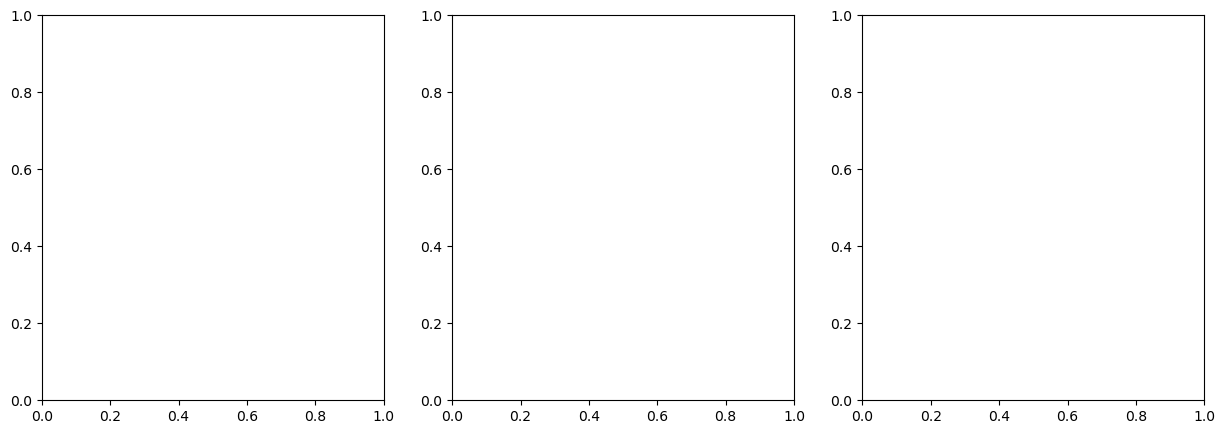

In [26]:
# view your plot
fig = plot(experiments,models)
assert type(fig) == plt.Figure,("Plot function does not return Matplotlib Figure!")
assert len(fig.get_axes()) == 3,("Figure should consist of 3 subplots")
assert len(fig.get_axes()[0].get_xlabel()) != 0, ("Label your axes!")

Which statements about the plots are correct?

a_) Inference time follows a similar pattern for all but one classifier.<br>
b_) All models exhibit a linear relation between training time and data set size.<br>
c_) CNN_simple has the lowest accuracy for all dataset sizes.<br>
d_) The worst accuracy for a model on any dataset is lower than 40%. <br>
e_) The model with the shortest training time for a dataset fraction of 0.25 is a random forest.  <br>
f_) All classifiers have an accuracy higher than 80% when being trained on the full dataset.<br>
g_) Inference and training times indicate that SVMs are not performing well on large data sets compared to the CNN models.<br>
h_) A comparison of the performance of any two or more different algorithms is fair as long as they are compared on the same problem, i.e. the same training and test data.<br>
i_) A comparison of the performance of any two or more different algorithms should take into account the number of trainable model parameters and the training and inference times.<br>
j_) Comparing results for CNN_wide(_max) and CNN_deep, all three are very close in accuracy, thus the wide networks would be the preferred option, as wide CNN's generally train much faster than deep ones.


In [ ]:
# only use True and False as answers!
# examples for you:

statement_is_true = True
statement_is_false = False

# your answers go here ↓↓↓

a_=None
b_=None
c_=None
d_=None
e_=None
f_=None
g_=None
h_=None
i_=None
j_=None

The take home messages of this task are:
- The model choice depends on the size and complexity of the data set
- The model choice is constrained by the available computing and time resources
- Neural networks are often a good choice for large data sets, e.g. CNNs on computer vision tasks
- For smaller problems alternatives like SVM or Random Forests can be more efficient
- There is no algorithm that guarantees superior performance on every problem (aka "No free lunch"-Theorem)